### Hola! Hoy voy a trabajar con un dataset bajado de Kaggle que reúne registros sobre los shows de la plataforma streaming Netflix.

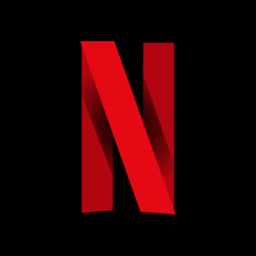

##IMPORTACION DE LIBRERIAS

In [306]:
import pandas as pd
import matplotlib.pyplot as plt

##CARGA DE DATASET

In [307]:
netflixDF = pd.read_csv('movies.csv')

##EXPLORACION PRELIMINAR

In [308]:
netflixDF.shape

(9999, 9)

In [309]:
netflixDF.dtypes

MOVIES       object
YEAR         object
GENRE        object
RATING      float64
ONE-LINE     object
STARS        object
VOTES        object
RunTime     float64
Gross        object
dtype: object

Chequeo si hay registros duplicados.

In [310]:
netflixDF.duplicated().sum()

431

In [311]:
netflixDF = netflixDF.drop_duplicates()

In [312]:
netflixDF.duplicated().sum()

0

In [313]:
netflixDF.shape

(9568, 9)

Puedo corroborar que había de hecho unos 431 registros duplicados que ya fueron eliminados.

In [314]:
netflixDF.sample(10)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
5308,Issaq,(2013),"\nDrama, Romance",4.5,\nA contemporary adaptation of Romeo and Julie...,\n Director:\nManish Tiwary\n| \n Stars:...,449,148.0,NaN
5879,Sunshine Scouts,NaN,\nComedy,NaN,\nA group of teenage girls survive the apocaly...,\n,NaN,NaN,NaN
5084,Vilas: Serás lo que debas ser o no serás nada,(2020),"\nDocumentary, Biography, Sport",7.2,\nAn Argentine journalist strives to prove tha...,\n Director:\nMatías Gueilburt\n| \n Sta...,589,94.0,NaN
1595,Kôkaku kidôtai: Stand Alone Complex,(2002–2005),"\nAnimation, Action, Crime",8.5,\nThe futuristic adventures of a female cyborg...,"\n \n Stars:\nShirô Saitô, \nMar...","18,383",24.0,NaN
6503,Dexter,(2006–2013),"\nCrime, Drama, Mystery",8.3,\nDexter's world is rocked when a rival serial...,\n Director:\nMichael Cuesta\n| \n Stars...,"5,581",55.0,NaN
8621,Chichipatos,(2020– ),\nComedy,5.6,\nWhen a U.S. federal agent shows up to extrad...,\n Director:\nJuan Camilo Pinzon\n| \n S...,7,NaN,NaN
4754,Follow Me,(VI) (2018),\nDocumentary,5.1,\nAfter hearing that some people get paid $500...,\n Director:\nAsri Bendacha\n,250,80.0,NaN
3796,Sonora,(I) (2018),"\nDrama, Thriller, Western",6.3,"\n1931 in Mexico, under pressure from Sonora g...",\n Director:\nAlejandro Springall\n| \n ...,532,94.0,NaN
7576,The Big Show Show,(2020),\nComedy,7.6,\nLola's best friend from Minnesota comes for ...,\n Director:\nLeonard R. Garner Jr.\n| \n ...,95,26.0,NaN
2840,Love Aaj Kal,(2020),"\nDrama, Romance",4.7,\nWhen professional ambitions clash with perso...,\n Director:\nImtiaz Ali\n| \n Stars:\nK...,"7,937",142.0,NaN


Luego de ejecutar un sample de 10 registros, observo que la columna "Gross" arrojó todos valores NaN, decido revisar específicamente esa columna para cotejar si fue mera coincidencia o es efectivamente una columna con valores totalmente nulos:

In [315]:
netflixDF['Gross'].unique()

array([nan, '$75.47M', '$402.45M', '$89.22M', '$315.54M', '$57.01M',
       '$260.00M', '$132.38M', '$167.77M', '$404.52M', '$15.07M',
       '$70.10M', '$210.61M', '$327.48M', '$390.53M', '$303.00M',
       '$56.63M', '$58.06M', '$353.01M', '$46.89M', '$7.00M', '$377.85M',
       '$107.83M', '$403.71M', '$316.83M', '$100.55M', '$28.26M',
       '$188.76M', '$213.52M', '$226.01M', '$408.08M', '$10.06M',
       '$14.84M', '$168.05M', '$183.64M', '$342.55M', '$96.52M',
       '$140.22M', '$172.56M', '$56.95M', '$330.36M', '$17.80M', '$0.20M',
       '$56.82M', '$66.21M', '$75.61M', '$4.56M', '$106.58M', '$5.02M',
       '$22.68M', '$102.92M', '$110.52M', '$504.01M', '$26.86M', '$2.00M',
       '$32.73M', '$33.80M', '$400.74M', '$19.02M', '$36.26M', '$6.67M',
       '$45.51M', '$75.66M', '$0.33M', '$4.00M', '$20.16M', '$95.86M',
       '$176.48M', '$126.66M', '$80.10M', '$42.34M', '$0.04M', '$4.71M',
       '$117.72M', '$229.09M', '$33.70M', '$97.69M', '$21.15M', '$27.85M',
       '$25.02

Pura coincidencia :)

Veo que en varias columnas se repiten los siguientes carácteres "\n". Decido eliminarlos para que la lectura de los registros sea mas concisa y clara.

In [316]:
netflixDF['GENRE'] = netflixDF['GENRE'].replace({'\n': ''}, regex=True)
netflixDF['ONE-LINE'] = netflixDF['ONE-LINE'].replace({'\n': ''}, regex=True)
netflixDF['STARS'] = netflixDF['STARS'].replace({'\n': ''}, regex=True)

In [317]:
netflixDF.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri B...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michel...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman R...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Pa...","414,849",23.0,NaN
4,Army of Thieves,(2021),"Action, Crime, Horror",NaN,"A prequel, set before the events of Army of th...",Director:Matthias Schweighöfer| Stars:...,NaN,NaN,NaN


La columna 'GENRE' tiene como máximo 3 géneros distintos por registro de película. Por ende, para análisis posteriores, decido separar los géneros alojados en una sola columna por una columna por género.

In [318]:
generos = netflixDF['GENRE'].str.split(expand=True)
generos.columns =['Genero 1', 'Genero 2', 'Genero 3']
netflixDFNew = pd.concat([netflixDF, generos], axis=1)
netflixDFNew['Genero 1'] = netflixDFNew['Genero 1'].replace({',': ''}, regex=True)
netflixDFNew['Genero 2'] = netflixDFNew['Genero 2'].replace({',': ''}, regex=True)
netflixDFNew.drop(['GENRE'], axis=1, inplace=True)

In [319]:
netflixDFNew

,MOVIES,YEAR,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,Genero 1,Genero 2,Genero 3
0,Blood Red Sky,(2021),6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri B...,"21,062",121.0,NaN,Action,Horror,Thriller
1,Masters of the Universe: Revelation,(2021– ),5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michel...","17,870",25.0,NaN,Animation,Action,Adventure
2,The Walking Dead,(2010–2022),8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman R...","885,805",44.0,NaN,Drama,Horror,Thriller
3,Rick and Morty,(2013– ),9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Pa...","414,849",23.0,NaN,Animation,Adventure,Comedy
4,Army of Thieves,(2021),NaN,"A prequel, set before the events of Army of th...",Director:Matthias Schweighöfer| Stars:...,NaN,NaN,NaN,Action,Crime,Horror
...,...,...,...,...,...,...,...,...,...,...,...
9993,Totenfrau,(2022– ),NaN,Add a Plot,Director:Nicolai Rohde| Stars:Felix Kl...,NaN,NaN,NaN,Drama,Thriller,None
9995,Arcane,(2021– ),NaN,Add a Plot,,NaN,NaN,NaN,Animation,Action,Adventure
9996,Heart of Invictus,(2022– ),NaN,Add a Plot,Director:Orlando von Einsiedel| Star:P...,NaN,NaN,NaN,Documentary,Sport,None
9997,The Imperfects,(2021– ),NaN,Add a Plot,Director:Jovanka Vuckovic| Stars:Morga...,NaN,NaN,NaN,Adventure,Drama,Fantasy


Decido cambiar los nombres de las columnas al español, ya que en la modificación de la columna "GENRE" sus nuevas columnas fueron nombradas en español. De esta forma, se mantiene una coherencia a la hora de leer el dataset.

In [320]:
netflixDFNew.rename(columns={'MOVIES' : 'Título', 'YEAR' : 'Año', 'RATING' : 'Rating', 'ONE-LINE' : 'Sinopsis', 'STARS' : 'Reparto', 'VOTES' : 'Votos', 'RunTime' : 'Duración', 'Gross' : 'Taquilla'}, inplace=True)

In [321]:
netflixDFNew.head()

,Título,Año,Rating,Sinopsis,Reparto,Votos,Duración,Taquilla,Genero 1,Genero 2,Genero 3
0,Blood Red Sky,(2021),6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri B...,"21,062",121.0,NaN,Action,Horror,Thriller
1,Masters of the Universe: Revelation,(2021– ),5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michel...","17,870",25.0,NaN,Animation,Action,Adventure
2,The Walking Dead,(2010–2022),8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman R...","885,805",44.0,NaN,Drama,Horror,Thriller
3,Rick and Morty,(2013– ),9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Pa...","414,849",23.0,NaN,Animation,Adventure,Comedy
4,Army of Thieves,(2021),NaN,"A prequel, set before the events of Army of th...",Director:Matthias Schweighöfer| Stars:...,NaN,NaN,NaN,Action,Crime,Horror


Por una cuestion de comodidad, reorganizo el orden de las columnas del dataset.

In [322]:
netflixDFNew = netflixDFNew.reindex(columns=['Título', 'Año', 'Genero 1', 'Genero 2', 'Genero 3', 'Sinopsis', 'Reparto', 'Duración', 'Taquilla',  'Votos', 'Rating' ] )

In [323]:
netflixDFNew

,Título,Año,Genero 1,Genero 2,Genero 3,Sinopsis,Reparto,Duración,Taquilla,Votos,Rating
0,Blood Red Sky,(2021),Action,Horror,Thriller,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri B...,121.0,NaN,"21,062",6.1
1,Masters of the Universe: Revelation,(2021– ),Animation,Action,Adventure,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michel...",25.0,NaN,"17,870",5.0
2,The Walking Dead,(2010–2022),Drama,Horror,Thriller,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman R...",44.0,NaN,"885,805",8.2
3,Rick and Morty,(2013– ),Animation,Adventure,Comedy,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Pa...",23.0,NaN,"414,849",9.2
4,Army of Thieves,(2021),Action,Crime,Horror,"A prequel, set before the events of Army of th...",Director:Matthias Schweighöfer| Stars:...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9993,Totenfrau,(2022– ),Drama,Thriller,None,Add a Plot,Director:Nicolai Rohde| Stars:Felix Kl...,NaN,NaN,NaN,NaN
9995,Arcane,(2021– ),Animation,Action,Adventure,Add a Plot,,NaN,NaN,NaN,NaN
9996,Heart of Invictus,(2022– ),Documentary,Sport,None,Add a Plot,Director:Orlando von Einsiedel| Star:P...,NaN,NaN,NaN,NaN
9997,The Imperfects,(2021– ),Adventure,Drama,Fantasy,Add a Plot,Director:Jovanka Vuckovic| Stars:Morga...,NaN,NaN,NaN,NaN


###A CONTINUACIÓN, UNA VEZ FINALIZADO LA LIMPIEZA DEL DATASET, VOY A TRATAR DE SACAR CIERTOS DATOS RELEVANTES DEL MISMO.

Primero hago un recuento de los géneros de las peliculas.

In [324]:
gen1 = netflixDFNew.groupby(['Genero 1'])['Título'].count().sort_values(ascending=False)
gen2 = netflixDFNew.groupby(['Genero 2'])['Título'].count().sort_values(ascending=False)
gen3 = netflixDFNew.groupby(['Genero 3'])['Título'].count().sort_values(ascending=False)

In [325]:
sumaGeneros = pd.concat([gen1, gen2, gen3])
sumaGeneros = sumaGeneros.groupby(sumaGeneros.index).sum().sort_values(ascending=False)

Debajo podemos observar que "Drama" es el género mas popular (tener en cuenta que cada película llega a contar en algunos casos hasta con 3 géneros distintos en su descripción.).

In [326]:
sumaGeneros

Drama          4115
Comedy         2736
Action         2110
Adventure      1588
Animation      1584
Crime          1519
Documentary    1221
Thriller        895
Mystery         840
Romance         835
Fantasy         537
Horror          518
Family          442
Reality-TV      370
History         346
Biography       311
Sci-Fi          303
Short           247
Music           200
Sport           192
Game-Show        98
Talk-Show        89
Musical          61
War              48
Western          24
News             23
Film-Noir        12
Name: Título, dtype: int64

Procedo a graficar los resultados con Matplotlib.

<function matplotlib.pyplot.show(close=None, block=None)>

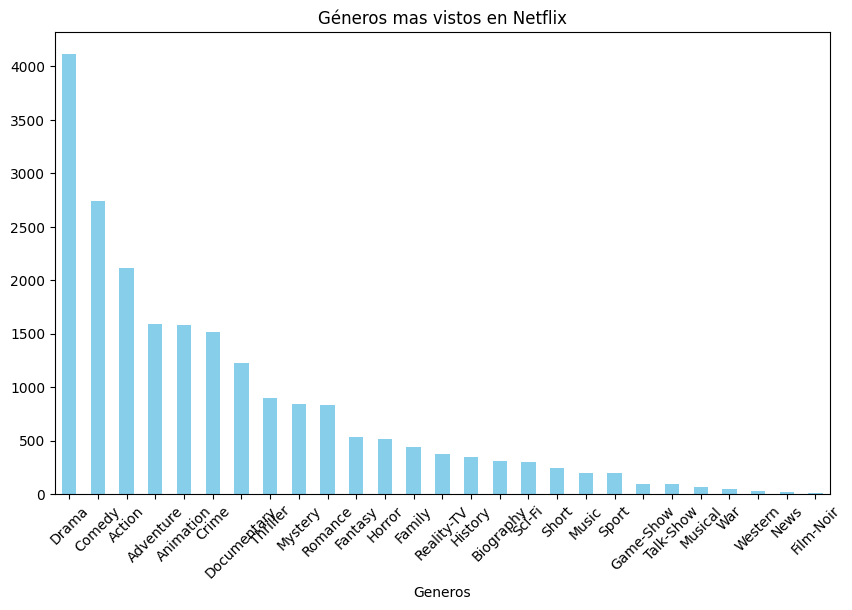

In [327]:
plt.figure(figsize=(10, 6))
sumaGeneros.plot(kind='bar', color='skyblue')
plt.title('Géneros mas vistos en Netflix')
plt.xlabel('Generos')
plt.xticks(rotation=45)
plt.tight_layout
plt.show

Ahora me propongo averiguar cuáles son los títulos de Netflix mejor puntuados:

In [328]:
mejoresPuntuaciones = netflixDFNew.groupby(['Título'])['Rating'].mean().sort_values(ascending=False)

Aquí observo los 10 mejores valorados.

In [329]:
mejoresPuntuaciones.head(10)

Título
Stranger Things: Spotlight     9.400000
Breaking Bad                   9.400000
Cosmos: A Spacetime Odyssey    9.300000
Avatar: The Last Airbender     9.300000
Our Planet                     9.300000
 Dark                          9.286667
 Anne                          9.233333
 Mighty Little Bheem           9.200000
Kotaro Lives Alone             9.200000
Rick and Morty                 9.200000
Name: Rating, dtype: float64

Realizo otro gráfico de barras tomando los 20 títulos con mejor calificación según los usuarios.

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

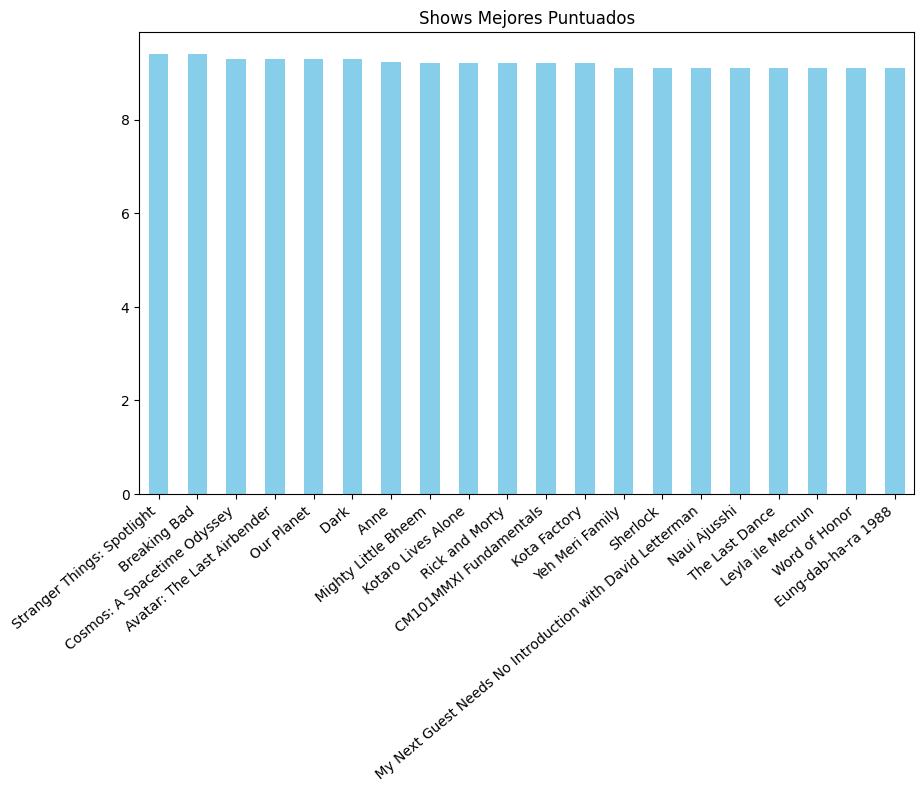

In [330]:
plt.figure(figsize=(10, 6))
mejoresPuntuaciones.head(20).plot(kind='bar', color='skyblue')
plt.title('Shows Mejores Puntuados')
plt.xlabel('')
plt.xticks(rotation=40, ha='right')
plt.tight_layout
plt.plot


Digamos que ahora quiero revisar lo opuesto a lo visto anteriormente: Cuáles son las películas con peores puntuaciones y a que géneros pertenecen.

Para este caso particular y sólo por una cuestión de fácil lectura,  me conviene tener los géneros de las películas (que son mas de 3 en algunos casos) todos en una sola columna. Así que procedo a unir las 3 columnas de géneros antes de realizar el análisis.

In [331]:
netflixDFNew['Géneros combinados'] = netflixDFNew['Genero 1'] + ',' + netflixDFNew['Genero 2'] + ',' + netflixDFNew['Genero 3']
bajaPuntuacion = netflixDFNew.groupby('Título').filter(lambda x: x['Rating'].mean() <= 4)
bajaPuntuacion = bajaPuntuacion.groupby(['Título', 'Géneros combinados'])['Rating'].mean().sort_values()

NOTA: Tomé arbitrariamente como "baja puntuación" todas las que sean iguales o menores a 4.

In [332]:
bajaPuntuacion.head(5)

Título              Géneros combinados    
Raketsonyeondan     Comedy,Drama,Sport        1.1
Way of the Vampire  Action,Horror,Thriller    2.0
River of Darkness   Action,Horror,Thriller    2.1
Hajwala             Action,Adventure,Crime    2.1
Sinister Squad      Action,Comedy,Fantasy     2.1
Name: Rating, dtype: float64

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

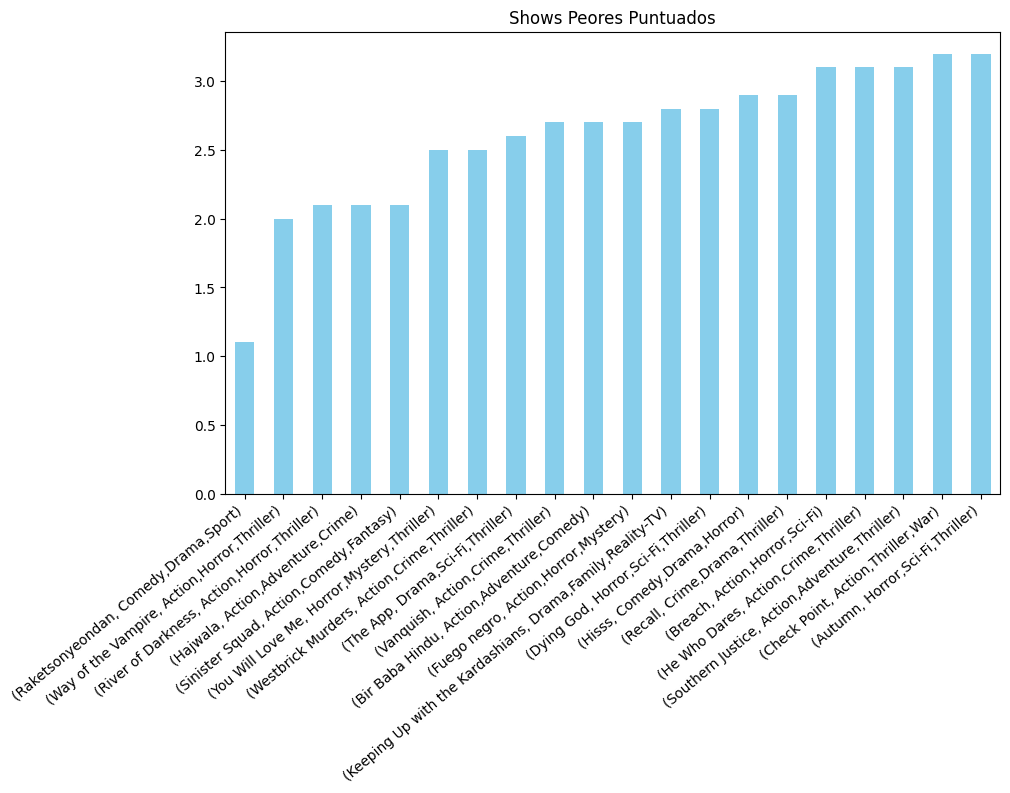

In [333]:
plt.figure(figsize=(10, 6))
bajaPuntuacion.head(20).plot(kind='bar', color='skyblue')
plt.title('Shows Peores Puntuados')
plt.xlabel('')
plt.xticks(rotation=40, ha='right')
plt.tight_layout
plt.plot

Teniendo en cuenta la columna "Votos" me propongo averiguar si los shows más votados influyen en los resultados de mejores o peores shows.

Aquí tenía errores cuando queria realizar la agrupación y resultó que la columna "Votos" no estaba contemplada como datos de tipo numérico (se me pasó al comienzo, puede pasar!!! :P )

In [334]:
netflixDFNew['Votos'] = pd.to_numeric(netflixDFNew['Votos'], errors='coerce')

In [335]:
showsMasVotados = netflixDFNew.groupby('Título')['Votos'].mean().sort_values(ascending=False)

Debajo podemos observar que no hay relación aparente entre los shows mas votados y las mejores/peores puntuaciones.

In [336]:
showsMasVotados.head(10)

Título
Bed & Breakfast: Love is a Happy Accident                             999.0
The Day I Met El Chapo: The Kate Del Castillo Story                   998.0
Alien Xmas                                                            997.0
Sky Tour: The Movie                                                   996.0
Iron Fists and Kung Fu Kicks                                          996.0
Itai no wa Iya nano de Bougyoryoku ni Kyokufuri Shitai to Omoimasu    996.0
Been So Long                                                          996.0
Black Site Delta                                                      995.0
Gleipnir                                                              994.0
Laibeu                                                                994.0
Name: Votos, dtype: float64

In [337]:
showsMenosVotados = netflixDFNew.groupby('Título')['Votos'].mean().sort_values()

Lo mismo podemos observar entre los shows menos votados:

In [338]:
showsMenosVotados.head(10)

Título
Skylanders Academy: Happy Birthday to You!    5.000000
 Lugar de Mulher                              5.000000
 La Reina de Indias y el Conquistador         5.000000
LEGO Friends: Happy Birthday to You!          5.000000
Kacche Dhaagey                                5.000000
 Meerkat Manor                                5.714286
Fuller House: Anniversary Celebration         6.000000
Tokyo kaiki zake                              6.000000
Pusong ligaw                                  6.000000
Nohzdyve                                      6.000000
Name: Votos, dtype: float64

##Si llegaste hasta acá, te agradezco! Si tenés alguna sugerencia o encontras algún problema en mi código o resultados, te agradecería que te pongas en contacto conmigo! Siempre estoy para aprender y recibir consejos! 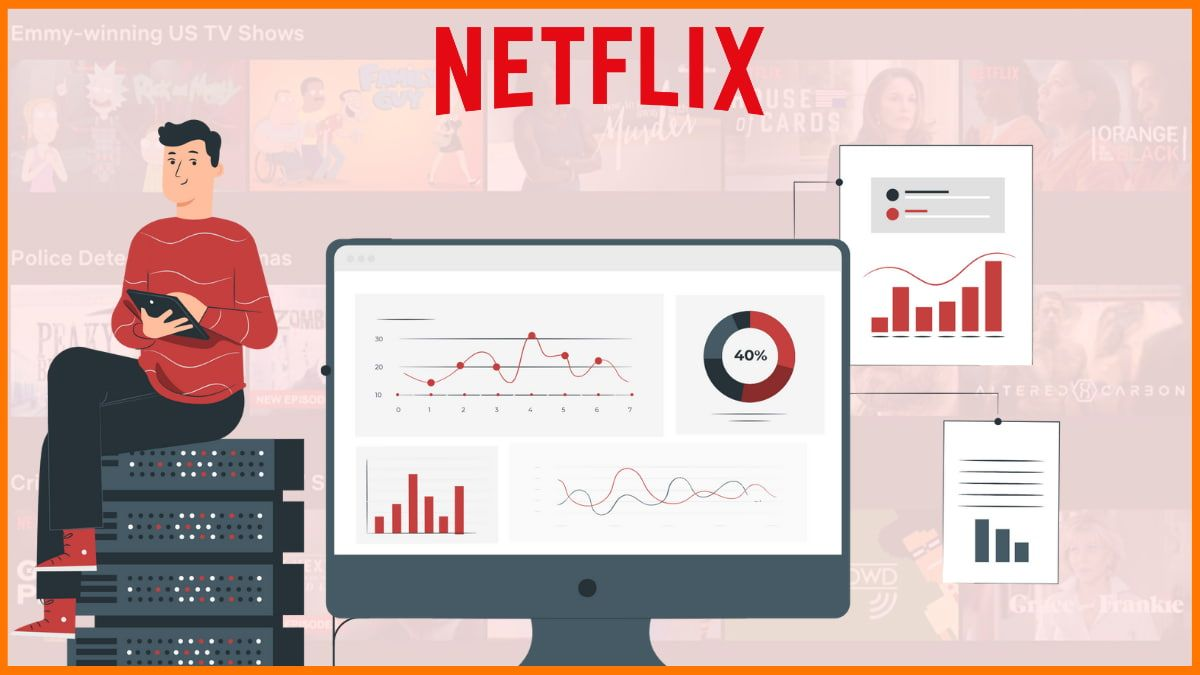